<a href="https://colab.research.google.com/github/sarabert96/Colexification/blob/main/01_DataUnderstanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLICS 3 Data Understanding

Import libraries

In [8]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

Obtaining raw dataframe from Google Drive

In [2]:
!gdown --id 1O4Ofd0xX6I1eGcYPOQ0ET2_w-MEB5ybR #df_all_raw

Downloading...
From: https://drive.google.com/uc?id=1O4Ofd0xX6I1eGcYPOQ0ET2_w-MEB5ybR
To: /content/df_all_raw.csv
212MB [00:01, 117MB/s]


In [3]:
df = pd.read_csv('df_all_raw.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape

(1390594, 16)

In [ ]:
df.head()

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,Glottocode,ISO639P3code,Macroarea,Family,Latitude,Longitude
0,abrahammonpa,BugunBichom-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Bichom,bich1234,NaN,NaN,Sino-Tibetan,NaN,NaN
1,abrahammonpa,BugunKaspi-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Kaspi,kasp1234,NaN,NaN,Sino-Tibetan,NaN,NaN
2,abrahammonpa,BugunNamphri-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Namphri,namp1239,NaN,NaN,Sino-Tibetan,NaN,NaN
3,abrahammonpa,BugunSingchung-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Singchung,sing1271,NaN,NaN,Sino-Tibetan,NaN,NaN
4,abrahammonpa,BugunWangho-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Wangho,wang1301,NaN,NaN,Sino-Tibetan,NaN,NaN


In [ ]:
df[df['variety']=="Italian"]

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,Glottocode,ISO639P3code,Macroarea,Family,Latitude,Longitude
108675,diacl,53500-100_many-1,molto,molto,NaN,1198,MANY,Other,Quantity,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
108958,diacl,53500-101_meatflesh-1,carne,carne,NaN,2615,FLESH OR MEAT,Person/Thing,The body,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
109488,diacl,53500-105_mouth-1,bocca,bocca,NaN,674,MOUTH,Person/Thing,The body,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
109754,diacl,53500-106_name-1,nome,nome,NaN,1405,NAME,Person/Thing,Speech and language,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
110235,diacl,53500-109_neck-1,collo,collo,NaN,1333,NECK,Person/Thing,The body,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953863,northeuralex,ita-999_learn-1,imparare,imparare,learn,504,LEARN,Action/Process,Cognition,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
953864,northeuralex,ita-999_learn-2,apːrɛndere,aprendere,learn,504,LEARN,Action/Process,Cognition,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
953989,northeuralex,ita-99_slope-1,pendio,pendio,slope,3076,SLOPE,Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
954116,northeuralex,ita-9_face-1,vizo,vizo,face,1560,FACE,Person/Thing,The body,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489


In [4]:
dfna = df.dropna()

In [ ]:
dfna[dfna['variety']=='Italian']

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,Glottocode,ISO639P3code,Macroarea,Family,Latitude,Longitude
208056,ids,170-1-100-1,mondo,mondo,world,965,WORLD,Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
208433,ids,170-1-210-1,terra,terra,"earth, land",626,LAND,Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
208928,ids,170-1-212-1,terreno,terreno,"earth=ground, soil",1228,EARTH (SOIL),Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
208929,ids,170-1-212-2,suolo,suolo,"earth=ground, soil",1228,EARTH (SOIL),Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
209371,ids,170-1-213-1,polvere,polvere,dust,2,DUST,Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953863,northeuralex,ita-999_learn-1,imparare,imparare,learn,504,LEARN,Action/Process,Cognition,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
953864,northeuralex,ita-999_learn-2,apːrɛndere,aprendere,learn,504,LEARN,Action/Process,Cognition,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
953989,northeuralex,ita-99_slope-1,pendio,pendio,slope,3076,SLOPE,Person/Thing,The physical world,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489
954116,northeuralex,ita-9_face-1,vizo,vizo,face,1560,FACE,Person/Thing,The body,Italian,ital1282,ita,Eurasia,Indo-European,43.0464,12.6489


In [ ]:
df['Macroarea'].value_counts()

Eurasia          630764
Papunesia        340588
Africa           149941
South America    117593
Australia         41036
North America     22827
Name: Macroarea, dtype: int64

Count unique values per column

In [ ]:
df.nunique()

dataset_ID                   30
Form_ID                 1390584
Form                     913591
clics_form               706169
gloss_in_source            7260
Concepticon_ID             2919
Concepticon_Gloss          2919
Ontological_Category          6
Semantic_Field               24
variety                    3050
Glottocode                 2279
ISO639P3code               1845
Macroarea                     6
Family                      201
Latitude                   1850
Longitude                  1835
dtype: int64

Distribution of concepts per family

In [ ]:
df.groupby('Family').size().describe()

count       201.000000
mean       6808.477612
std       24539.735747
min           4.000000
25%         201.000000
50%         895.000000
75%        1776.000000
max      181678.000000
dtype: float64

In [ ]:
df.groupby('Family').size().sort_values(ascending=True)

Family
Pahoturi                         4
Leco                             7
Yuracaré                         7
Chiquitano                       7
Kwaza                           13
                             ...  
Nuclear Trans New Guinea    109788
Sino-Tibetan                133819
Nakh-Daghestanian           137145
Austronesian                156014
Indo-European               181678
Length: 201, dtype: int64

In [34]:
concept_in_fam = list(df.groupby('Family').size())

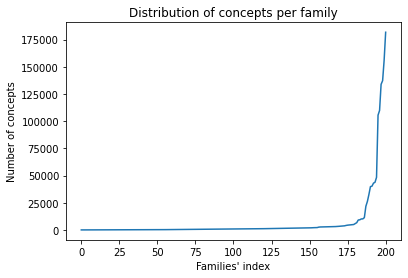

In [35]:
plt.plot(sorted(concept_in_fam))
plt.title("Distribution of concepts per family")
plt.ylabel('Number of concepts')
plt.xlabel("Families' index")
plt.show()

Analysis on the distribution of glottocode per family

In [5]:
df_fam = df[['Family','Glottocode']].copy()

In [7]:
df_fam=df_fam.drop_duplicates()

In [17]:
df_fam.head(2)

,Family,Glottocode
0,Sino-Tibetan,bich1234
1,Sino-Tibetan,kasp1234


In [ ]:
df_fam.groupby('Family').size().describe()

count    201.000000
mean      11.318408
std       42.064452
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      395.000000
dtype: float64

In [ ]:
df_fam.groupby('Family').size().sort_values(ascending=True)

Family
Zuni                          1
Karok                         1
Kapori                        1
Pawaia                        1
Peba-Yagua                    1
                           ... 
Pama-Nyungan                172
Indo-European               173
Sino-Tibetan                184
Nuclear Trans New Guinea    307
Austronesian                395
Length: 201, dtype: int64

In [31]:
glot_in_fam = list(df_fam.groupby('Family').size())

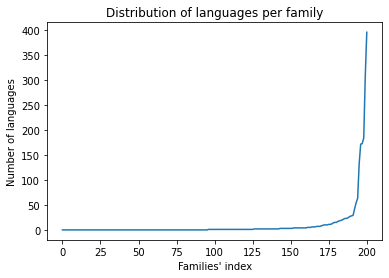

In [33]:
plt.plot(sorted(glot_in_fam))
plt.title("Distribution of languages per family")
plt.ylabel('Number of languages')
plt.xlabel("Families' index")
plt.show()

null values

In [ ]:
df.isna().sum()

dataset_ID                   0
Form_ID                      0
Form                        87
clics_form                 441
gloss_in_source          64676
Concepticon_ID               0
Concepticon_Gloss            0
Ontological_Category         0
Semantic_Field             108
variety                      0
Glottocode               19627
ISO639P3code            206325
Macroarea                87845
Family                   22090
Latitude                226992
Longitude               226992
dtype: int64

Adding tokenized column for a deeper analysis

In [ ]:
df['tk_variety']=df['variety'].apply(nltk.tokenize.word_tokenize)


As soon as we find a diachronic variety, this is printed and the for stopped

In [ ]:
for i in range(len(df['tk_variety'])):
  r = df['tk_variety'].iloc[i]
  if any((v == "Gothic") for v in r): # change key word
    print (r)
    break

['Gothic']


Count how many entries' varieties contains...

In [ ]:
c = 0
for i in range(len(df['tk_variety'])):
  r = df['tk_variety'].iloc[i]
  if any((v == "Gothic") for v in r): # change key word
    c+=1
print (c)

Check for duplicated rows

In [ ]:
df.loc[df.astype(str).drop_duplicates().index]

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,Glottocode,ISO639P3code,Macroarea,Family,Latitude,Longitude,tk_variety
0,abrahammonpa,BugunBichom-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Bichom,bich1234,NaN,NaN,Sino-Tibetan,NaN,NaN,"[Bugun, Bichom]"
1,abrahammonpa,BugunKaspi-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Kaspi,kasp1234,NaN,NaN,Sino-Tibetan,NaN,NaN,"[Bugun, Kaspi]"
2,abrahammonpa,BugunNamphri-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Namphri,namp1239,NaN,NaN,Sino-Tibetan,NaN,NaN,"[Bugun, Namphri]"
3,abrahammonpa,BugunSingchung-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Singchung,sing1271,NaN,NaN,Sino-Tibetan,NaN,NaN,"[Bugun, Singchung]"
4,abrahammonpa,BugunWangho-100_gold-1,san,san,gold,1369,GOLD,Person/Thing,Basic actions and technology,Bugun Wangho,wang1301,NaN,NaN,Sino-Tibetan,NaN,NaN,"[Bugun, Wangho]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390589,zgraggenmadang,yaben-9_boy-1,waw moya,wawmoya,boy,1366,BOY,Person/Thing,Kinship,yaben,yabe1255,ybm,Papunesia,Nuclear Trans New Guinea,-4.90868,145.361,[yaben]
1390590,zgraggenmadang,yangulam-9_boy-1,ilaŋgum,ilanggum,boy,1366,BOY,Person/Thing,Kinship,yangulam,yang1298,ynl,Papunesia,Nuclear Trans New Guinea,-5.52697,145.858,[yangulam]
1390591,zgraggenmadang,yangulam-9_boy-2,monaguru,monaguru,boy,1366,BOY,Person/Thing,Kinship,yangulam,yang1298,ynl,Papunesia,Nuclear Trans New Guinea,-5.52697,145.858,[yangulam]
1390592,zgraggenmadang,yarawata-9_boy-1,wa tamana,watamana,boy,1366,BOY,Person/Thing,Kinship,yarawata,yara1250,yrw,Papunesia,Nuclear Trans New Guinea,-4.93943,145.454,[yarawata]


Using a flag column, check concepticon with multiword, parentheses and OR

In [ ]:
# create column with word count: flag > 0 if multiword
df['flag'] = df['Concepticon_Gloss'].str.count(' ')

In [ ]:
symb=set('(-&')
for i in range(len(df['Concepticon_Gloss'])):
  r = df['Concepticon_Gloss'].iloc[i]
  if any((s in symb) for s in r):
    df['flag'].iloc[i]+=1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
l=[]
for i in range(len(df['Concepticon_Gloss'])):
  r = df['Concepticon_Gloss'].iloc[i]
  n = df['flag'].iloc[i]
  if n > 0:
    l.append(r)

In [ ]:
l=set(l)

In [ ]:
len(l)

908

In [ ]:
# save in a txt file
l= sorted(l)
with open('multiWConcepts.txt', 'w') as f:
    for item in l:
        f.write("%s\n" % item)